In [1]:
#Cuaderno ejecutado en COLAB

In [34]:
!git clone https://github.com/mecyc/TFG_RADAR_60GHZ.git

Cloning into 'TFG_RADAR_60GHZ'...
remote: Enumerating objects: 1480, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 1480 (delta 14), reused 17 (delta 8), pack-reused 1454
Receiving objects: 100% (1480/1480), 324.60 MiB | 14.26 MiB/s, done.
Resolving deltas: 100% (369/369), done.
Checking out files: 100% (706/706), done.


In [3]:
!pip install tabpfn[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from tabpfn import TabPFNClassifier

import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools 


from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

#Ignorar warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Se define la la función que muestra la matriz de confusión
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks([-0.5,0,1,2,2.5], ["","carton","cristal","plastico"])

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalizar matriz de confusion")
    #else:
        #print('Matriz de confusion')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
train = np.load('TFG_RADAR_60GHZ/scripts/train.npy')
test = np.load('TFG_RADAR_60GHZ/scripts/test.npy')

In [1]:
# N_ensemble_configurations controla la cantidad de predicciones del modelo que se combinan con rotaciones de características y clases.
# N_ensemble_configurations define cuántos estimadores se promedian, está limitado por N (características) * N (clases)
# Cuando N_ensemble_configurations > #features * #classes, no se aplica ningún promedio adicional. 
# Más miembros del conjunto son más lentos, pero más precisos
'''modelo = TabPFNClassifier(device='cpu', N_ensemble_configurations=300)'''

"modelo = TabPFNClassifier(device='cpu', N_ensemble_configurations=300)"

In [5]:
tabPFNClassifier_attsell = Pipeline([('att_sel', SelectFromModel(estimator=LogisticRegression(solver='newton-cg', max_iter=10000), #solver='saga'
                                                     threshold=-np.inf,
                                                     max_features = 100)),
                         ('clasificador', TabPFNClassifier(device='cpu', N_ensemble_configurations=300))])

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


Particion  1
Tasa de acierto: 0.8333333333333334


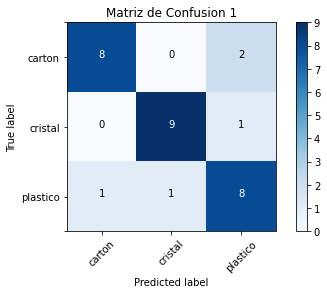

Particion  2


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Tasa de acierto: 0.8333333333333334


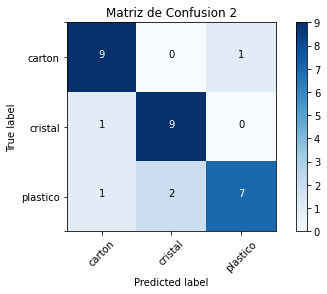

Particion  3


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Tasa de acierto: 0.9


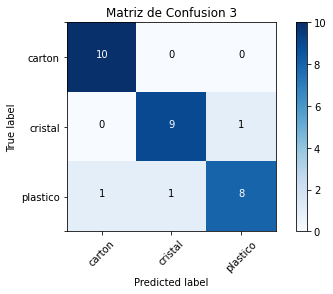

Particion  4
Tasa de acierto: 0.9333333333333333


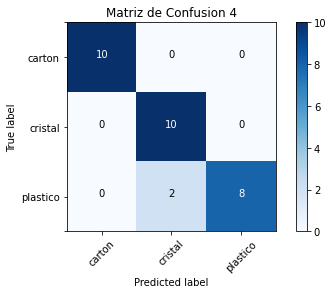

Particion  5


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Tasa de acierto: 0.9333333333333333


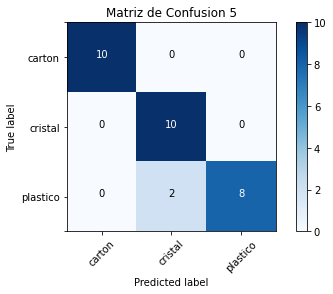

Particion  6


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Tasa de acierto: 0.9333333333333333


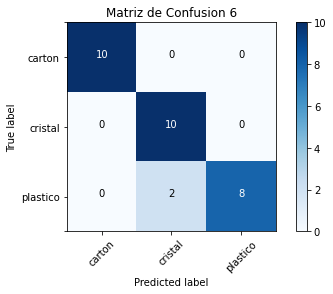

Particion  7


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Tasa de acierto: 0.9


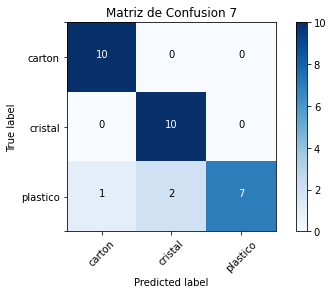

Particion  8


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Tasa de acierto: 0.9333333333333333


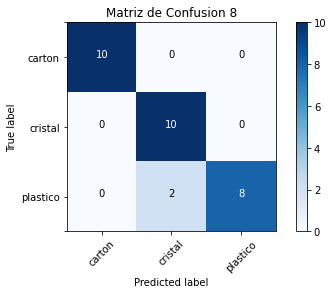

Particion  9
Tasa de acierto: 0.9


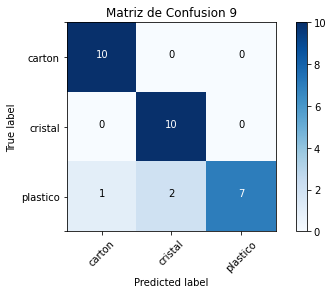

Particion  10


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Tasa de acierto: 0.9


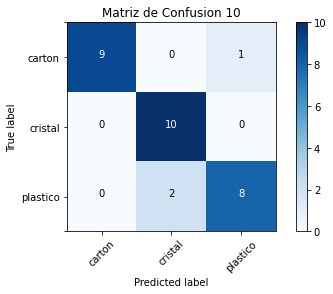

TODAS LAS PARTICIONES
Tasa de acierto promedio:  0.9000


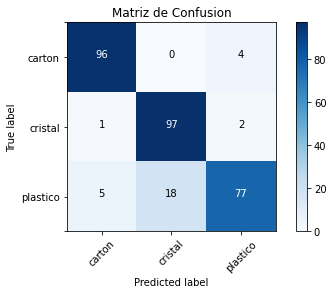

In [6]:
x_train = list()
y_train = list()
x_test = list()
y_test = list()
y_prds = list()
y_prds2 = list()
y_test2 = list()
media = 0


#Entrenamos el modelo dejando fuera una vista por objeto en cada interacción con las particiones ya creadas
for i in range(len(train)):
    x_train = list()
    x_test = list()
    y_train = list()
    y_test = list()
    print("Particion ", i + 1)
    
    y_train = np.array([0]*int(train[i].shape[0]/3) #carton 0
                    +  [1]*int(train[i].shape[0]/3)  #plastico 1
                    +  [2]*int(train[i].shape[0]/3)) #cristal 2
    y_test = np.array([0]*int(test[i].shape[0]/3) 
                   +  [1]*int(test[i].shape[0]/3) 
                   +  [2]*int(test[i].shape[0]/3))
    #print(len(y_train[0]))
    
    x_train = train[i]
    x_test = test[i]
    
    #for j in range(len(train[i])):
    #    x_train.append(train[i][j])
    #modelo = TabPFNClassifier(device='cpu', N_ensemble_configurations=32)  
    #modelo.max_num_features=600  
    
    '''tabPFNClassifier_attsell = Pipeline([('att_sel', SelectFromModel(estimator=LogisticRegression(max_iter=2000),
                                                     threshold=-np.inf,
                                                     max_features = 100)),
                         ('clasificador', TabPFNClassifier(device='cpu', N_ensemble_configurations=300))])
    '''
    tabPFNClassifier_attsell.fit(x_train,y_train)
    
    y_pred = tabPFNClassifier_attsell.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    
    y_test2.extend(y_test)
    y_prds2.extend(y_pred)
    
    print('Tasa de acierto:',score)
    media += score
    
    #Confusion matrix
    #cm = confusion_matrix(y_test, y_prds)
    plt.figure() #num=None, figsize=(8, 6), dpi=80
    plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes= ["carton","cristal","plastico"], 
                          title='Matriz de Confusion ' + str(i+1))
    plt.show()

print("TODAS LAS PARTICIONES")
print("Tasa de acierto promedio: {0: 0.4f}".format(media/len(test)))

#Confusion matrix (TODO)
#cm = confusion_matrix(y_test2, y_prds2)
plt.figure() #num=None, figsize=(8, 6), dpi=80
plot_confusion_matrix(confusion_matrix(y_test2, y_prds2), classes= ["carton","cristal","plastico"], 
                      title='Matriz de Confusion')
plt.show()

# -------------------------------------------------------------------------------
# CREAMOS EL MODELO CON TabPFN

In [35]:
#Se crea el modelo a partir de TabPFN

In [36]:
tabPFNClassifier_attsell = Pipeline([('att_sel', SelectFromModel(estimator=LogisticRegression(solver='newton-cg', max_iter=10000), #solver='saga'
                                                     threshold=-np.inf,
                                                     max_features = 100)),
                         ('clasificador', TabPFNClassifier(device='cpu', N_ensemble_configurations=300))])

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [37]:
#Para entrenar el modelo utilizaremos tanto los datos de entrenamiento como de test unidos, todo el conjunto de datos

datos = np.load('TFG_RADAR_60GHZ/scripts/conjunto_datos.npy')

In [38]:
x_train = list()

#Cogemos la primera partición tanto de test como entrenamiento
x_train = datos

y_train = np.array([0]*int(x_train.shape[0]/3) #carton 0
                +  [1]*int(x_train.shape[0]/3)  #plastico 1
                +  [2]*int(x_train.shape[0]/3)) #cristal 2


tabPFNClassifier_attsell.fit(x_train,y_train)
    

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Pipeline(steps=[('att_sel',
                 SelectFromModel(estimator=LogisticRegression(max_iter=10000,
                                                              solver='newton-cg'),
                                 max_features=100, threshold=-inf)),
                ('clasificador',
                 TabPFNClassifier(N_ensemble_configurations=300))])

In [39]:
import joblib

In [40]:
joblib.dump(tabPFNClassifier_attsell, 'modeloTabPFN.pkl')

['modeloTabPFN.pkl']

In [41]:
from google.colab import files
files.download('modeloTabPFN.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>